<a href="https://colab.research.google.com/github/Mohammed70S/binary_classification/blob/main/Binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('heart_disease_health_indicators.csv')
print(df.head())


   HeartDiseaseorAttack  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                     0       1         1          1   40       1       0   
1                     0       0         0          0   25       1       0   
2                     0       1         1          1   28       0       0   
3                     0       1         0          1   27       0       0   
4                     0       1         1          1   24       0       0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0         0             0       0  ...              1            0        5   
1         0             1       0  ...              0            1        3   
2         0             0       1  ...              1            1        5   
3         0             1       1  ...              1            0        2   
4         0             1       1  ...              1            0        2   

   MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Income  

In [2]:
print(df.isnull().sum())


HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [3]:
df.fillna(method='ffill', inplace=True)  # Example: forward fill


<ipython-input-3-ccac8d51870e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Example: forward fill


In [4]:
X = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack']


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [7]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8982 - loss: 0.3020 - val_accuracy: 0.9068 - val_loss: 0.2434 - learning_rate: 1.0000e-04
Epoch 2/100
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9086 - loss: 0.2372 - val_accuracy: 0.9076 - val_loss: 0.2415 - learning_rate: 1.0000e-04
Epoch 3/100
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9060 - loss: 0.2417 - val_accuracy: 0.9080 - val_loss: 0.2402 - learning_rate: 1.0000e-04
Epoch 4/100
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9090 - loss: 0.2371 - val_accuracy: 0.9082 - val_loss: 0.2395 - learning_rate: 1.0000e-04
Epoch 5/100
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9082 - loss: 0.2373 - val_accuracy: 0.9078 - val_loss: 0.2398 - learning_rate: 1.0000e-04
Epoch 6/100
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9085 - loss: 0.2356 - val_accuracy: 0.9085 - val_loss: 0.2392 - learning_rate: 1.0000e-04
Epoch 7/100
5074/5074 ━━━━━━━━━━━━━━━━━━

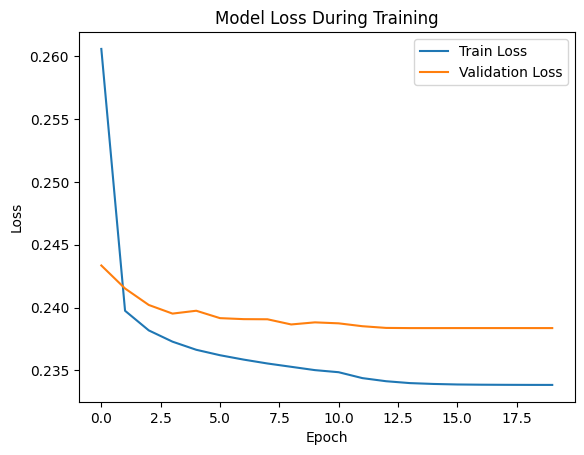

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD
from keras.callbacks import LearningRateScheduler, EarlyStopping

# 1. Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification for heart disease

# 2. Optimizer with adjusted learning rate
learning_rate = 0.0001  # Adjusted learning rate
optimizer = Adam(learning_rate=learning_rate)  # You can also try SGD(learning_rate=0.001, momentum=0.9)

# 3. Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 4. Learning Rate Scheduler
def lr_scheduler(epoch, lr):
    if epoch > 10:  # Reduce learning rate after 10 epochs
        return lr * 0.5
    return lr

lr_callback = LearningRateScheduler(lr_scheduler)

# 5. Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 6. Train the model with both callbacks
history = model.fit(
    X_train, y_train,
    epochs=100,  # Increased epochs to ensure model has time to converge with lower learning rate
    validation_split=0.2,
    batch_size=32,
    callbacks=[lr_callback, early_stop]  # Add both LearningRateScheduler and EarlyStopping callbacks
)

# 7. Plot the training loss to visualize performance
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [10]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 8.2 MB/s eta 0:00:00


In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras_tuner as kt

# Load the dataset
df = pd.read_csv('heart_disease_health_indicators.csv')
print(df.head())
print(df.isnull().sum())

# Preprocess data
df.fillna(method='ffill', inplace=True)  # Example: forward fill
X = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define a function to build the model, which will be tuned
def build_model(hp):
    model = Sequential()
    # Tune the number of units in the first Dense layer
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_shape=(X_train.shape[1],)))

    # Tune the number of layers and neurons
    for i in range(hp.Int('num_layers', 1, 4)):
        model.add(Dense(units=hp.Int(f'layer_{i}_units', min_value=32, max_value=512, step=32), activation='relu'))

    # Output layer (for binary classification)
    model.add(Dense(1, activation='sigmoid'))

    # Tune the learning rate
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    optimizer = Adam(learning_rate=learning_rate)

    # Compile the model
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Set up the Keras Tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Number of models to try
    executions_per_trial=1,  # Number of times to train the model with the same hyperparameters
    directory='my_dir',
    project_name='heart_disease_tuning'
)

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best number of units in the first layer: {best_hps.get('units')}")
print(f"Best number of layers: {best_hps.get('num_layers')}")
print(f"Best learning rate: {best_hps.get('learning_rate')}")

# Build the best model and retrain it
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32)

# Evaluate and print metrics
y_pred = (best_model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))


Trial 5 Complete [00h 06m 06s]
val_accuracy: 0.9073079228401184

Best val_accuracy So Far: 0.9078746438026428
Total elapsed time: 01h 32m 22s
Best number of units in the first layer: 352
Best number of layers: 4
Best learning rate: 0.0001
Epoch 1/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 47s 9ms/step - accuracy: 0.9062 - loss: 0.2539 - val_accuracy: 0.9076 - val_loss: 0.2415
Epoch 2/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 46s 9ms/step - accuracy: 0.9081 - loss: 0.2379 - val_accuracy: 0.9072 - val_loss: 0.2385
Epoch 3/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 78s 8ms/step - accuracy: 0.9073 - loss: 0.2370 - val_accuracy: 0.9077 - val_loss: 0.2391
Epoch 4/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 82s 8ms/step - accuracy: 0.9100 - loss: 0.2316 - val_accuracy: 0.9068 - val_loss: 0.2403
Epoch 5/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 84s 9ms/step - accuracy: 0.9090 - loss: 0.2340 - val_accuracy: 0.9075 - val_loss: 0.2387
Epoch 6/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 47s 9ms/step - accuracy: 0.9092 - loss: 0.2338 - val_accuracy: 0